# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import string
import random
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
# !pip install mahotas
import os
import cv2
import mahotas as mt
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
import pandas as pd
obs = pd.read_csv('dataset/species_observation/csv/location_top_100_csv.csv')

obs.columns


import random
random.seed(2711)

index_mapping = [i for i in range(100)]

random.shuffle(index_mapping)
index_mapping


obs_sub_h = obs[~obs['height'].isna()]



random.seed(2611)

samples_list_60 = list(dataset['target_val'].value_counts().index[:100])
# print(samples_list_60)

parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]



sample_targets = random.sample(samples_list_60,30)
random.shuffle(sample_targets)


# sample_numbs =[10,20,30]
# svm_dict = {}
# for sn in tqdm(sample_numbs):
#     svm_dict[sn] = []
#     for i in range(5):
#         svm_dict[sn].append({})
#         sample_targets = random.sample(samples_list_60,sn)


In [24]:

random.seed(2611)
sample_targets = random.sample(samples_list_60,30)
random.shuffle(sample_targets)


sample_targets_to_index ={}
for i,sample_target in enumerate(sample_targets):
    sample_targets_to_index[sample_target] = i
    

for k in sample_targets_to_index:
    st = index_mapping[sample_targets_to_index[k]]
    
    


sample_numbs =[10,20,30] 
svm_dict = {}
seed = 2611
for sn in tqdm(sample_numbs):
    svm_dict[sn] = []
    for i in range(10):
        svm_dict[sn].append({})
        sample_targets = random.sample(samples_list_60,sn)
        
        sample_targets_to_index ={}
        for ii,sample_target in enumerate(sample_targets):
            sample_targets_to_index[sample_target] = ii


        st = sample_targets[0]
        st0 = index_mapping[sample_targets_to_index[st]]
        norths = []
        heights = []
        dat = dataset[dataset['target_val'].isin([st])].sample(n=60, random_state=seed+i)
        a = obs_sub_h[obs_sub_h['target'].isin([st0])].sample(n=60, random_state=seed+i)[['Nordkoordinat','height']]
        norths += a['Nordkoordinat'].to_list()
        heights += a['height'].to_list()
        
        for st in sample_targets[1:]:
            temp_dat = dataset[dataset['target_val'].isin([st])].sample(n=60, random_state=seed+i)
            dat = pd.concat([dat,temp_dat])
            a = obs_sub_h[obs_sub_h['target'].isin([st0])].sample(n=60, random_state=seed+i)[['Nordkoordinat','height']]
            norths += a['Nordkoordinat'].to_list()
            heights += a['height'].to_list()
            
        dat['heights'] = heights
        dat['norths'] = norths
            
        X = dat[['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity','mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','contrast','correlation','inverse_difference_moments','entropy','heights','norths']]
        # X = dat[['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity','mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','contrast','correlation','inverse_difference_moments','entropy','heights']]
        # X = dat[['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity','mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','contrast','correlation','inverse_difference_moments','entropy','norths']]
        y = dat['target_val'].to_list()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)


        clf = svm.SVC()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        svm_dict[sn][i]['y_pred']=y_pred
        svm_dict[sn][i]['y_test']=y_test
        svm_dict[sn][i]['clf']=clf
        

        # print(metrics.classification_report(y_test, y_pred))
        svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
        svm_clf.fit(X_train, y_train)
        y_pred_svm = svm_clf.predict(X_test)
        
        svm_dict[sn][i]['y_pred_svm']=y_pred_svm


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:55<00:00, 98.56s/it]


In [29]:
accuracy_avg = []
prec_avg = []
recall_avg = []
fscore_avg = []
accuracy_max = []
prec_max = []
recall_max = []
fscore_max = []
for sn in sample_numbs:
    prec = []
    recall = []
    fscore = []
    accuracy = []
    for a in svm_dict[sn]:
        accuracy.append(metrics.accuracy_score(a['y_test'], a['y_pred_svm']))
        prfs = metrics.precision_recall_fscore_support(a['y_test'],a['y_pred_svm'],average='weighted')
        prec.append(prfs[0])
        recall.append(prfs[1])
        fscore.append(prfs[2])
    prec_avg.append(np.average(prec))
    recall_avg.append(np.average(recall))
    fscore_avg.append(np.average(fscore))
    accuracy_avg.append(np.average(accuracy))
    prec_max.append(np.max(prec))
    recall_max.append(np.max(recall))
    fscore_max.append(np.max(fscore))
    accuracy_max.append(np.max(accuracy))
    
metrics_dict = {}


metrics_dict['Number of plants'] = sample_numbs
metrics_dict['Average Accuracy'] = accuracy_avg
metrics_dict['Average Precision'] = prec_avg
metrics_dict['Average Recall'] = recall_avg
metrics_dict['Average F-score'] = fscore_avg
metrics_dict['Max F-score'] = fscore_max
metrics_dict['Max Accuracy'] = accuracy_max
metrics_dict['Max Precision'] = prec_max
metrics_dict['Max Recall'] = recall_max

metrics_df1 = pd.DataFrame(metrics_dict)
metrics_df1 = metrics_df1.set_index('Number of plants')

In [30]:
# metrics_df = metrics_df.set_index('Number of plants')
metrics_df1.to_csv('C:/Users/vjosv/master/Plant-Leaf-Identification/Flavia py files/metrics_df_heights_norths.csv')

In [31]:
metrics_df1.columns

Index(['Average Accuracy', 'Average Precision', 'Average Recall',
       'Average F-score', 'Max F-score', 'Max Accuracy', 'Max Precision',
       'Max Recall'],
      dtype='object')

In [32]:
print(metrics_df1[['Average Accuracy','Max Accuracy', 'Average Precision','Max Precision',
       'Average F-score','Max F-score']].round(3).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & Average Accuracy & Max Accuracy & Average Precision & Max Precision & Average F-score & Max F-score \\
Number of plants &  &  &  &  &  &  \\
\midrule
10 & 0.752000 & 0.811000 & 0.768000 & 0.832000 & 0.752000 & 0.816000 \\
20 & 0.693000 & 0.756000 & 0.715000 & 0.772000 & 0.694000 & 0.759000 \\
30 & 0.628000 & 0.674000 & 0.648000 & 0.699000 & 0.627000 & 0.673000 \\
\bottomrule
\end{tabular}



In [14]:
metrics_df1_round3 = metrics_df1[['Average Accuracy','Max Accuracy', 'Average Precision','Max Precision',
       'Average F-score','Max F-score']].round(3)

print(metrics_df1_round3.to_latex())


\begin{tabular}{lrrrrrr}
\toprule
 & Average Accuracy & Max Accuracy & Average Precision & Max Precision & Average F-score & Max F-score \\
Number of plants &  &  &  &  &  &  \\
\midrule
10 & 0.785000 & 0.856000 & 0.798000 & 0.868000 & 0.785000 & 0.858000 \\
20 & 0.732000 & 0.781000 & 0.750000 & 0.796000 & 0.733000 & 0.780000 \\
30 & 0.676000 & 0.717000 & 0.693000 & 0.730000 & 0.674000 & 0.711000 \\
\bottomrule
\end{tabular}



In [92]:
import random

sample_number = 32
sample_list = [i for i in range(100)]
seed = 2611
random.seed(seed)

samples_list_60 = list(dataset['target_val'].value_counts().index[:-20])
# print(samples_list_60)

parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

sample_numbs =[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
# svm_dict = {}
for sn in tqdm(sample_numbs):
    svm_dict[sn] = []
    for i in range(5):
        svm_dict[sn].append({})
        sample_targets = random.sample(samples_list_60,sn)



        st = sample_targets[0]

        dat = dataset[dataset['target_val'].isin([st])].sample(n=60, random_state=seed+i)

        for st in sample_targets[1:]:
            temp_dat = dataset[dataset['target_val'].isin([st])].sample(n=60, random_state=seed+i)
            dat = pd.concat([dat,temp_dat])

        X = dat[['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity','mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','contrast','correlation','inverse_difference_moments','entropy']]
        y = dat['target_val'].to_list()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)


        clf = svm.SVC()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        
        svm_dict[sn][i]['y_pred']=y_pred
        svm_dict[sn][i]['y_test']=y_test
        svm_dict[sn][i]['clf']=clf
        

        # print(metrics.classification_report(y_test, y_pred))
        svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
        svm_clf.fit(X_train, y_train)
        y_pred_svm = svm_clf.predict(X_test)
        
        svm_dict[sn][i]['y_pred_svm']=y_pred_svm

        


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [2:48:36<00:00, 674.43s/it]


### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Id',
       'Taksonsorteringsrekkefølge', 'Valideringsstatus', 'Rødlistekategori',
       'Artsnavn', 'Vitenskapelig navn', 'Autor', 'Antall', 'Enhet', 'Alder',
       'Kjønn', 'Aktivitet', 'Metode', 'Superlokalitet', 'Lokalitetsnavn',
       'Østkoordinat', 'Nordkoordinat', 'Nøyaktighet', 'Originale koordinater',
       'Fylke', 'Kommune', 'Fylke.1', 'IKKE I NORGE', 'Ekstern id',
       'Startdato', 'Stattidspunkt', 'Sluttdato', 'Sluttidspunkt', 'Kommentar',
       'Ikke gjenfunnet', 'Usikker artsbestemmelse', 'Uspontan', 'Natursystem',
       'Natursystem beskrivelse', 'Livsmedium', 'Vitenskapelig livsmediumnavn',
       'Art som livsmedium, beskrivelse', 'Livsmedium.1',
       'Livsmediumbeskrivelse', 'Min. dybde', 'Maks. dybde', 'Høyde min',
       'Høyde maks', 'Offentlig samling', 'Privat samling', 'Bekreftelsesdato',
       'Redigeringsansvarlig', 'Rapportør', 'Observatører', 'science_name',
       'target', '

array([24, 24,  2, ..., 23, 30, 13])

In [61]:
import random

sample_number = 32
sample_list = [i for i in range(100)]
seed = 2611
random.seed(seed)

samples_list_60 = list(dataset['target_val'].value_counts().index[:-20])
# print(samples_list_60)

parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

sample_numbs =[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]
# svm_dict = {}
for sn in tqdm(sample_numbs):
    svm_dict[sn] = []
    for i in range(5):
        svm_dict[sn].append({})
        sample_targets = random.sample(samples_list_60,sn)



        st = sample_targets[0]

        dat = dataset[dataset['target_val'].isin([st])].sample(n=60, random_state=seed+i)

        for st in sample_targets[1:]:
            temp_dat = dataset[dataset['target_val'].isin([st])].sample(n=60, random_state=seed+i)
            dat = pd.concat([dat,temp_dat])

        X = dat[['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity','mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','contrast','correlation','inverse_difference_moments','entropy']]
        y = dat['target_val'].to_list()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

        sc_X = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)


        clf = svm.SVC()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        
        svm_dict[sn][i]['y_pred']=y_pred
        svm_dict[sn][i]['y_test']=y_test
        svm_dict[sn][i]['clf']=clf
        

        # print(metrics.classification_report(y_test, y_pred))
        svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
        svm_clf.fit(X_train, y_train)
        y_pred_svm = svm_clf.predict(X_test)
        
        svm_dict[sn][i]['y_pred_svm']=y_pred_svm

        




100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [3:17:22<00:00, 740.13s/it]


In [93]:
a = svm_dict[20][0]
a['y_pred']
a['y_test']

print(metrics.accuracy_score(a['y_test'], a['y_pred_svm']))
a = svm_dict[10][0]
a['y_pred']
a['y_test']
print(metrics.accuracy_score(a['y_test'], a['y_pred_svm']))



0.725
0.7722222222222223


In [103]:
accuracy_avg = []
prec_avg = []
recall_avg = []
fscore_avg = []
accuracy_max = []
prec_max = []
recall_max = []
fscore_max = []
for sn in sample_numbs:
    prec = []
    recall = []
    fscore = []
    accuracy = []
    for a in svm_dict[sn]:
        accuracy.append(metrics.accuracy_score(a['y_test'], a['y_pred_svm']))
        prfs = metrics.precision_recall_fscore_support(a['y_test'],a['y_pred_svm'],average='weighted')
        prec.append(prfs[0])
        recall.append(prfs[1])
        fscore.append(prfs[2])
    prec_avg.append(np.average(prec))
    recall_avg.append(np.average(recall))
    fscore_avg.append(np.average(fscore))
    accuracy_avg.append(np.average(accuracy))
    prec_max.append(np.max(prec))
    recall_max.append(np.max(recall))
    fscore_max.append(np.max(fscore))
    accuracy_max.append(np.max(accuracy))
    
metrics_dict = {}


metrics_dict['Number of plants'] = sample_numbs
metrics_dict['Average Accuracy/Recall'] = accuracy_avg
metrics_dict['Average Precision'] = prec_avg
metrics_dict['Average Recall'] = recall_avg
metrics_dict['Average F-score'] = fscore_avg
metrics_dict['Max Accuracy/Recall'] = accuracy_max
metrics_dict['Max Precision'] = prec_max
metrics_dict['Max Recall'] = recall_max
metrics_dict['Max F-score'] = fscore_max
metrics_df = pd.DataFrame(metrics_dict)
metrics_df = metrics_df.set_index('Number of plants')

In [105]:
metrics_df.to_csv('C:/Users/vjosv/master/Plant-Leaf-Identification/Flavia py files/metrics_df.csv')
print(metrics_df[['Average Accuracy/Recall','Average Precision','Average F-score']].to_latex())

print(metrics_df[['Average Accuracy/Recall','Max Accuracy/Recall','Average Precision','Max Precision','Average F-score','Max F-score']].to_latex())

\begin{tabular}{lrrr}
\toprule
 & Average Accuracy/Recall & Average Precision & Average F-score \\
Number of plants &  &  &  \\
\midrule
10 & 0.800000 & 0.807718 & 0.797978 \\
20 & 0.758889 & 0.766373 & 0.755975 \\
30 & 0.722593 & 0.733121 & 0.721245 \\
40 & 0.658333 & 0.678088 & 0.657659 \\
50 & 0.652667 & 0.667447 & 0.650861 \\
60 & 0.653519 & 0.670683 & 0.652448 \\
70 & 0.603968 & 0.623043 & 0.602709 \\
80 & 0.594306 & 0.610624 & 0.591558 \\
90 & 0.595432 & 0.615135 & 0.594681 \\
100 & 0.572556 & 0.591465 & 0.568878 \\
110 & 0.568485 & 0.587163 & 0.567096 \\
120 & 0.556296 & 0.572671 & 0.554090 \\
130 & 0.546752 & 0.564628 & 0.543553 \\
140 & 0.536905 & 0.554720 & 0.533285 \\
150 & 0.539556 & 0.560265 & 0.537692 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrr}
\toprule
 & Average Accuracy/Recall & Max Accuracy/Recall & Average Precision & Max Precision & Average F-score & Max F-score \\
Number of plants &  &  &  &  &  &  \\
\midrule
10 & 0.800000 & 0.822222 & 0.807718 & 0.8289

In [104]:
X = dat[['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity','mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b','contrast','correlation','inverse_difference_moments','entropy']]
X
y = dat['target_val'].to_list()


In [105]:
#adding 
X.head()

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
10491,23218.0,654.333041,176,193,0.911917,1.463003,18.440509,136.898657,159.281848,149.384546,68.422388,48.446324,51.749488,44.573794,0.992583,0.557269,8.449497
9030,21189.0,611.445741,190,164,1.158537,1.470574,17.644339,41.763453,60.420859,49.728237,65.292497,74.435175,66.438759,121.900082,0.989644,0.649331,5.931357
20159,27678.5,727.144223,224,194,1.154639,1.570027,19.102868,120.459084,147.290059,133.390386,92.886008,73.702483,81.456218,61.532927,0.995215,0.392191,10.504224
22907,20085.0,596.700572,189,167,1.131737,1.571471,17.727238,139.739876,162.059271,151.769551,69.864119,48.225891,50.897792,38.525553,0.993626,0.587446,7.980129
11969,23292.5,638.918827,187,174,1.074713,1.396930,17.525696,46.206095,70.141621,56.130341,63.736855,77.825265,67.417630,143.307722,0.986177,0.610651,6.145145


In [175]:
v = np.array([1,2,3,4])

### 

In [178]:
np.average([1,2,3,4])

2.5

### Train test split

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

In [108]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
9147,1611.5,228.894443,95,44,2.159091,2.593857,32.511738,5.519731,5.824777,5.229811,33.643745,33.983270,31.878106,97.765886,0.962700,0.957086,0.832677
5790,1131.0,153.681239,51,46,1.108696,2.074271,20.882337,200.605708,208.461077,199.948461,12.601371,10.023716,9.755774,38.043675,0.833512,0.889919,3.898658
7841,6833.0,426.166521,73,162,0.450617,1.730719,26.579526,229.264868,230.382235,231.971739,68.219668,64.756391,62.938440,267.797782,0.948137,0.874919,2.205558
14434,4646.0,269.137083,69,91,0.758242,1.351485,15.590781,7.942742,8.045002,7.307119,38.054096,36.691848,34.255042,121.437662,0.986601,0.911019,1.699424
11145,26062.5,642.575682,181,183,0.989071,1.270906,15.842820,141.058634,156.777862,158.468989,111.436795,96.180356,95.665330,250.737061,0.986932,0.588128,6.472990


In [109]:
y_train[0:5]

[4, 165, 171, 67, 9]

### Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [112]:
X_train[0:2]

array([[-1.30076924, -1.2454805 , -0.70655324, -1.7248755 ,  2.70373976,
         1.72931817,  1.10851161, -1.51493919, -1.61684345, -1.56820154,
        -1.18431032, -0.88184897, -0.96605973, -0.12227042, -0.14338324,
         1.51618448, -1.82157152],
       [-1.34957559, -1.5855809 , -1.3815461 , -1.68983968,  0.22783264,
         0.72691716, -0.16560235,  1.19809568,  1.14261759,  1.12727545,
        -2.12678599, -2.10147917, -2.05045124, -0.69978464, -2.28780064,
         1.14258639, -0.72836233]])

In [113]:
y_train[0:2]

[4, 165]

### Applying SVM classifier model

In [114]:
from sklearn import svm

In [115]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [116]:
y_pred = clf.predict(X_test)

In [117]:
from sklearn import metrics

In [118]:
metrics.accuracy_score(y_test, y_pred)

0.4201388888888889

In [137]:
a =metrics.classification_report(y_test, y_pred)

C:\Users\vjosv\anaconda3\envs\cuda_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vjosv\anaconda3\envs\cuda_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vjosv\anaconda3\envs\cuda_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
print(a)

              precision    recall  f1-score   support

           4       0.50      0.57      0.53        14
           8       0.94      0.89      0.91        18
           9       0.80      0.36      0.50        22
          10       0.25      0.30      0.27        20
          13       0.87      0.87      0.87        23
          14       0.21      0.67      0.32        18
          27       0.19      0.65      0.30        17
          40       0.50      0.90      0.64        20
          45       0.58      0.44      0.50        16
          48       0.33      0.11      0.16        19
          52       0.67      0.11      0.18        19
          53       0.00      0.00      0.00        16
          58       0.11      0.27      0.15        11
          63       0.33      0.42      0.37        19
          67       0.17      0.29      0.21        17
          69       0.62      0.50      0.55        16
          75       0.27      0.25      0.26        16
          86       0.17    

### Performing parameter tuning of the model

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [122]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [123]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [124]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.045 (+/-0.024) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.106 (+/-0.006) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.253 (+/-0.036) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.445 (+/-0.041) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.470 (+/-0.051) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.503 (+/-0.055) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.106 (+/-0.012) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.238 (+/-0.029) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.415 (+/-0.031) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.574 (+/-0.070) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.587 (+/-0.020) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.590 (+/-0.042) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.233 (+/-0.028) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.385 (+/-0.035) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.567 (+/-0.075) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.626 (+/-0.058) for {'C': 100, 'gamma': 0.1, 'kernel':

In [125]:
y_pred_svm = svm_clf.predict(X_test)

In [126]:
metrics.accuracy_score(y_test, y_pred_svm)

0.6840277777777778

In [128]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           4       0.57      0.93      0.70        14
           8       0.94      0.94      0.94        18
           9       0.89      0.77      0.83        22
          10       0.55      0.60      0.57        20
          13       0.96      0.96      0.96        23
          14       0.65      0.94      0.77        18
          27       0.67      0.59      0.62        17
          40       0.73      0.95      0.83        20
          45       0.65      0.69      0.67        16
          48       0.60      0.47      0.53        19
          52       0.45      0.53      0.49        19
          53       0.30      0.38      0.33        16
          58       0.42      0.73      0.53        11
          63       0.79      0.58      0.67        19
          67       0.69      0.65      0.67        17
          69       0.74      0.88      0.80        16
          75       0.44      0.44      0.44        16
          86       0.50    

### Dimensionality Reduction using PCA

In [129]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA()

In [131]:
pca.fit(X)

PCA()

In [132]:
var= pca.explained_variance_ratio_
var

array([9.99662031e-01, 1.75286626e-04, 8.44273577e-05, 6.36343687e-05,
       6.43029505e-06, 5.39765996e-06, 1.27996726e-06, 5.63820722e-07,
       4.19114208e-07, 2.54695501e-07, 1.85801619e-07, 7.18058143e-08,
       1.60098008e-08, 1.00960347e-09, 5.88685910e-10, 2.62318565e-11,
       1.43495822e-11])

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

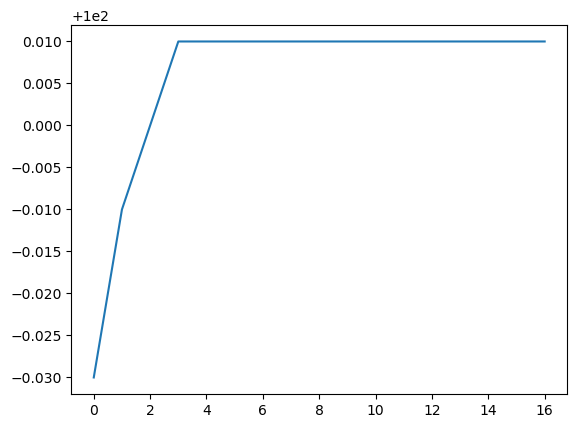

In [134]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

### Testing with mobile captured leaves which are not classified

In [39]:
import os
import cv2

In [42]:
def bg_sub(filename):
    test_img_path = '..\\mobile captures\\' + filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    ret_image, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [45]:
filename = '1000.jpg' 
bg_rem_img = bg_sub(filename)

[ WARN:0@40.403] global loadsave.cpp:248 findDecoder imread_('..\mobile captures\1000.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


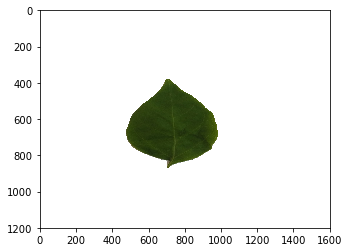

In [43]:
plt.imshow(bg_rem_img)

In [44]:
import mahotas as mt

In [45]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    image, contours, _ = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [46]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,153912.5,1581.907845,507,486,1.04321,1.600923,16.258799,3.72212,5.285164,1.348841,13.059666,18.114367,5.464123,14.528435,0.99761,0.951879,1.088378


In [47]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

18

In [48]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'Crape myrtle, Crepe myrtle'

In [12]:
print(y)

[24 24  2 ... 23 30 13]


In [15]:
list(y).count(y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [17]:
ly =list(y)

In [18]:
ly.count()

TypeError: count() takes exactly one argument (0 given)

In [19]:
pd.Series(ly).value_counts()

16    77
4     73
3     72
19    66
2     65
23    65
13    65
29    64
1     63
11    63
6     62
17    62
18    61
20    60
14    60
0     59
9     59
28    57
15    56
31    56
5     56
22    55
8     55
21    55
27    55
24    54
26    53
30    53
7     52
12    52
25    52
10    50
Name: count, dtype: int64